In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline

Our robustness data is not pickled as an ordered dictionary (`collections.OrderedDict`), we go ahead and convert it to one.

In [24]:
import pickle
from collections import OrderedDict
import datetime

with open('robustness.pickle', 'rb') as handle:
    robustness = pickle.load(handle)
    robustness = OrderedDict({
        attack_type: {
            timestamp: OrderedDict(result)
            for timestamp, result in sorted(timestamped_results.items())
        } for attack_type, timestamped_results in sorted(robustness.items())
    })

Now, we can define some utility functions in order to format timestamps and percentages to be used for keys in the `robustness` dictionary.

In [6]:
def format_percentage(percentage):
    """Format a percentage appropriately."""
    return "{:.3f}".format(percentage)


def format_timestamp(timestamp):
    """Format a timestamp appropriately."""
    return timestamp.strftime("%Y-%m")

The `robustness_over_time` function takes an attack type and a percentage as an argument, and returns a list of robustness measurements over time.

In [17]:
def robustness_over_time(attack_type, percentage):
    """Retrieve robustness data at a given percentage of removed nodes."""
    global robustness
    data = robustness[attack_type]
    return {timestamp: measurement[format_percentage(percentage)]
            for timestamp, measurement in data.items()}

We are now ready to plot some data.  We'll plot the size of the gigantic component at removal rates of $0$, $0.01$, $0.03$, and $0.1$.

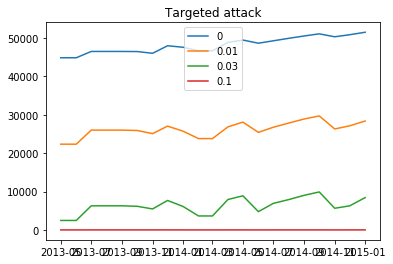

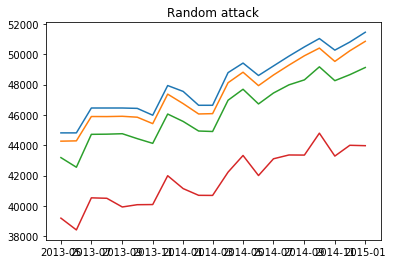

In [73]:
fig, ax = plt.subplots()
ax.set_title("Targeted attack")

def _get_data(attack_type, percentage):
    data = robustness_over_time(attack_type, percentage)
    return (list(map(lambda timestamp: datetime.datetime.strptime(timestamp, "%Y-%m"), data.keys())),
            list(map(lambda measurement: measurement[1], data.values())))

percentages = [0, 0.01, 0.03, 0.1]

for percentage in percentages:
    ax.plot(*_get_data('targeted', percentage))
    
ax.legend(percentages)

fig, ax = plt.subplots()
ax.set_title("Random attack")

for percentage in percentages:
    ax.plot(*_get_data('random', percentage))